In [2]:
pwd

'C:\\Users\\Thilipan'

In [3]:
cd downloads

C:\Users\Thilipan\downloads


In [4]:
words=open('names.txt','r').read().splitlines()

In [5]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [6]:
b={}
for w in words:
    chs=['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        # e  m  m  a
        # m  m  a  
        tup=(ch1,ch2)
        if tup not in b:
            b[tup]=1
        else:
            b[tup]+=1

In [7]:
z=sorted(b.items(), key = lambda kv: -kv[1])

In [8]:
import torch

In [9]:
N = torch.zeros((27,27), dtype=torch.int32)

In [10]:
chars=sorted(list(set(''.join(words))))
ctoi = {s:i+1 for i,s in enumerate(chars)}
ctoi["."] = 0
ctoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [11]:
for i in words:
    chs = ["."] + list(i) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        int1 = ctoi[ch1]
        int2 = ctoi[ch2]
        N[int1,int2]+=1

In [12]:
itos = {i+1:s for i,s in enumerate(chars)}
itos[0] = "."
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

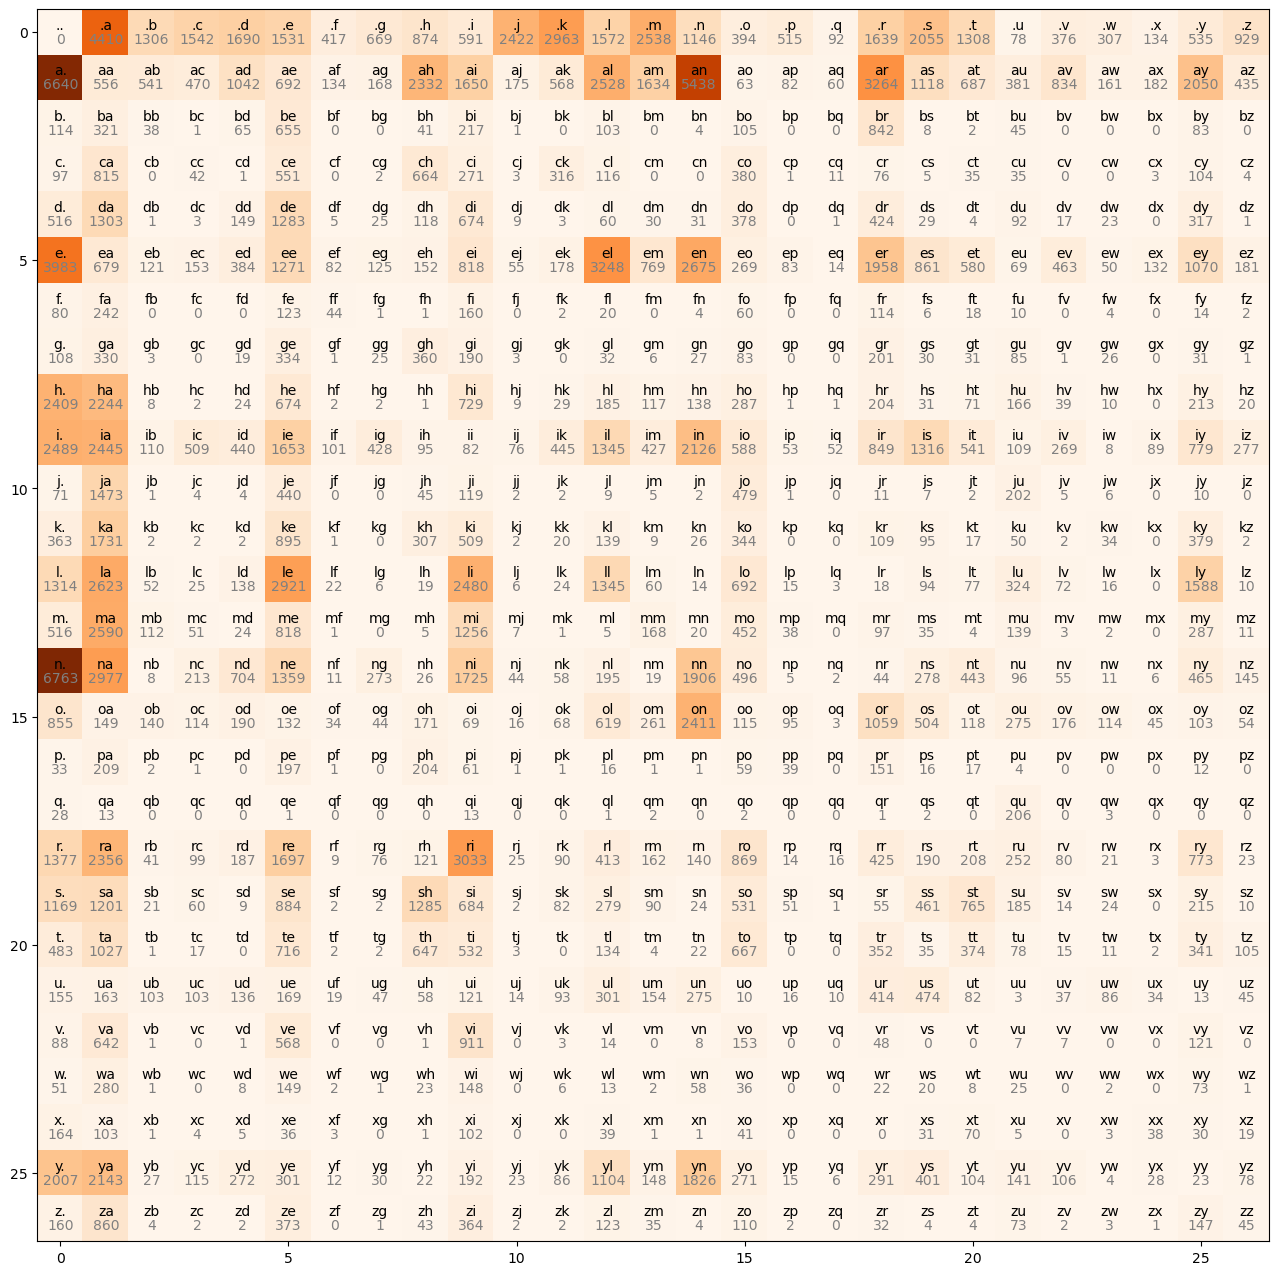

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N, cmap=("Oranges"))
for i in range(27):
    for j in range(27):
        summ = itos[i]+itos[j]
        plt.text(j,i,summ,ha="center",va="bottom")
        plt.text(j,i,N[i,j].item(),ha="center",va="top",color="grey")
plt.show()

In [14]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [15]:
a=N[0].float()
a.dtype

torch.float32

In [16]:
a=a/a.sum()
a

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

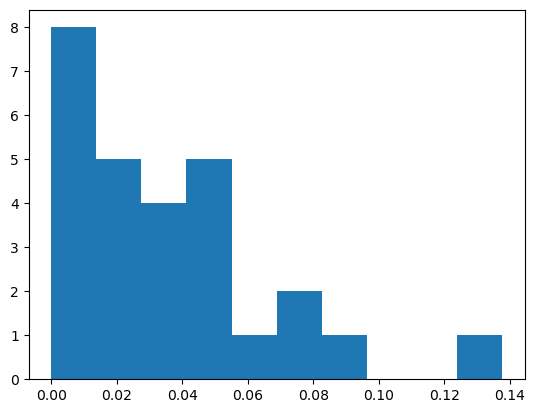

In [17]:
plt.hist(a)
plt.show()

In [18]:
g = torch.Generator().manual_seed(2147483647)
itox = torch.multinomial(a, num_samples=1, replacement = True, generator=g).item()
itos[itox]

'c'

In [20]:
#p.sum(1,keepdim=True).shape

to perform an element wse division on p  and p.sum
p is 27x27
p.sum is 27x1 when adding the rows

say 3x3 and 3x1

1 2 3     p.sum is 6, 15, 24
4 5 6              
7 8 9             

we eed to divide each of these element wise
if we dont give keepdim=True we will only have a 1D tensor like (6 ,15 ,24) so the shape is just [1]

which we cant broadcast and divide
for it to be broadcastable it should have keepdim=True
when keepdim = True
it becomes 3x1
so 
1 2 3,     p.sum is 6,
4 5 6,              15,
7 8 9,              24

ithu thaan gethunrathu

this is why in above statement we didnt use keepdim cuz we were element wise dividing N[0] which itself is a 1D tensor and when dividing it with p.sum then which also returned a 1D tensore things were fine

In [21]:
p = (N+20).float() #this will add 20 to all element wise, its for smoothing out cuz if N[i,j] is 0 we dont wnat inf as log
p/=p.sum(1, keepdim=True)
p.shape

torch.Size([27, 27])

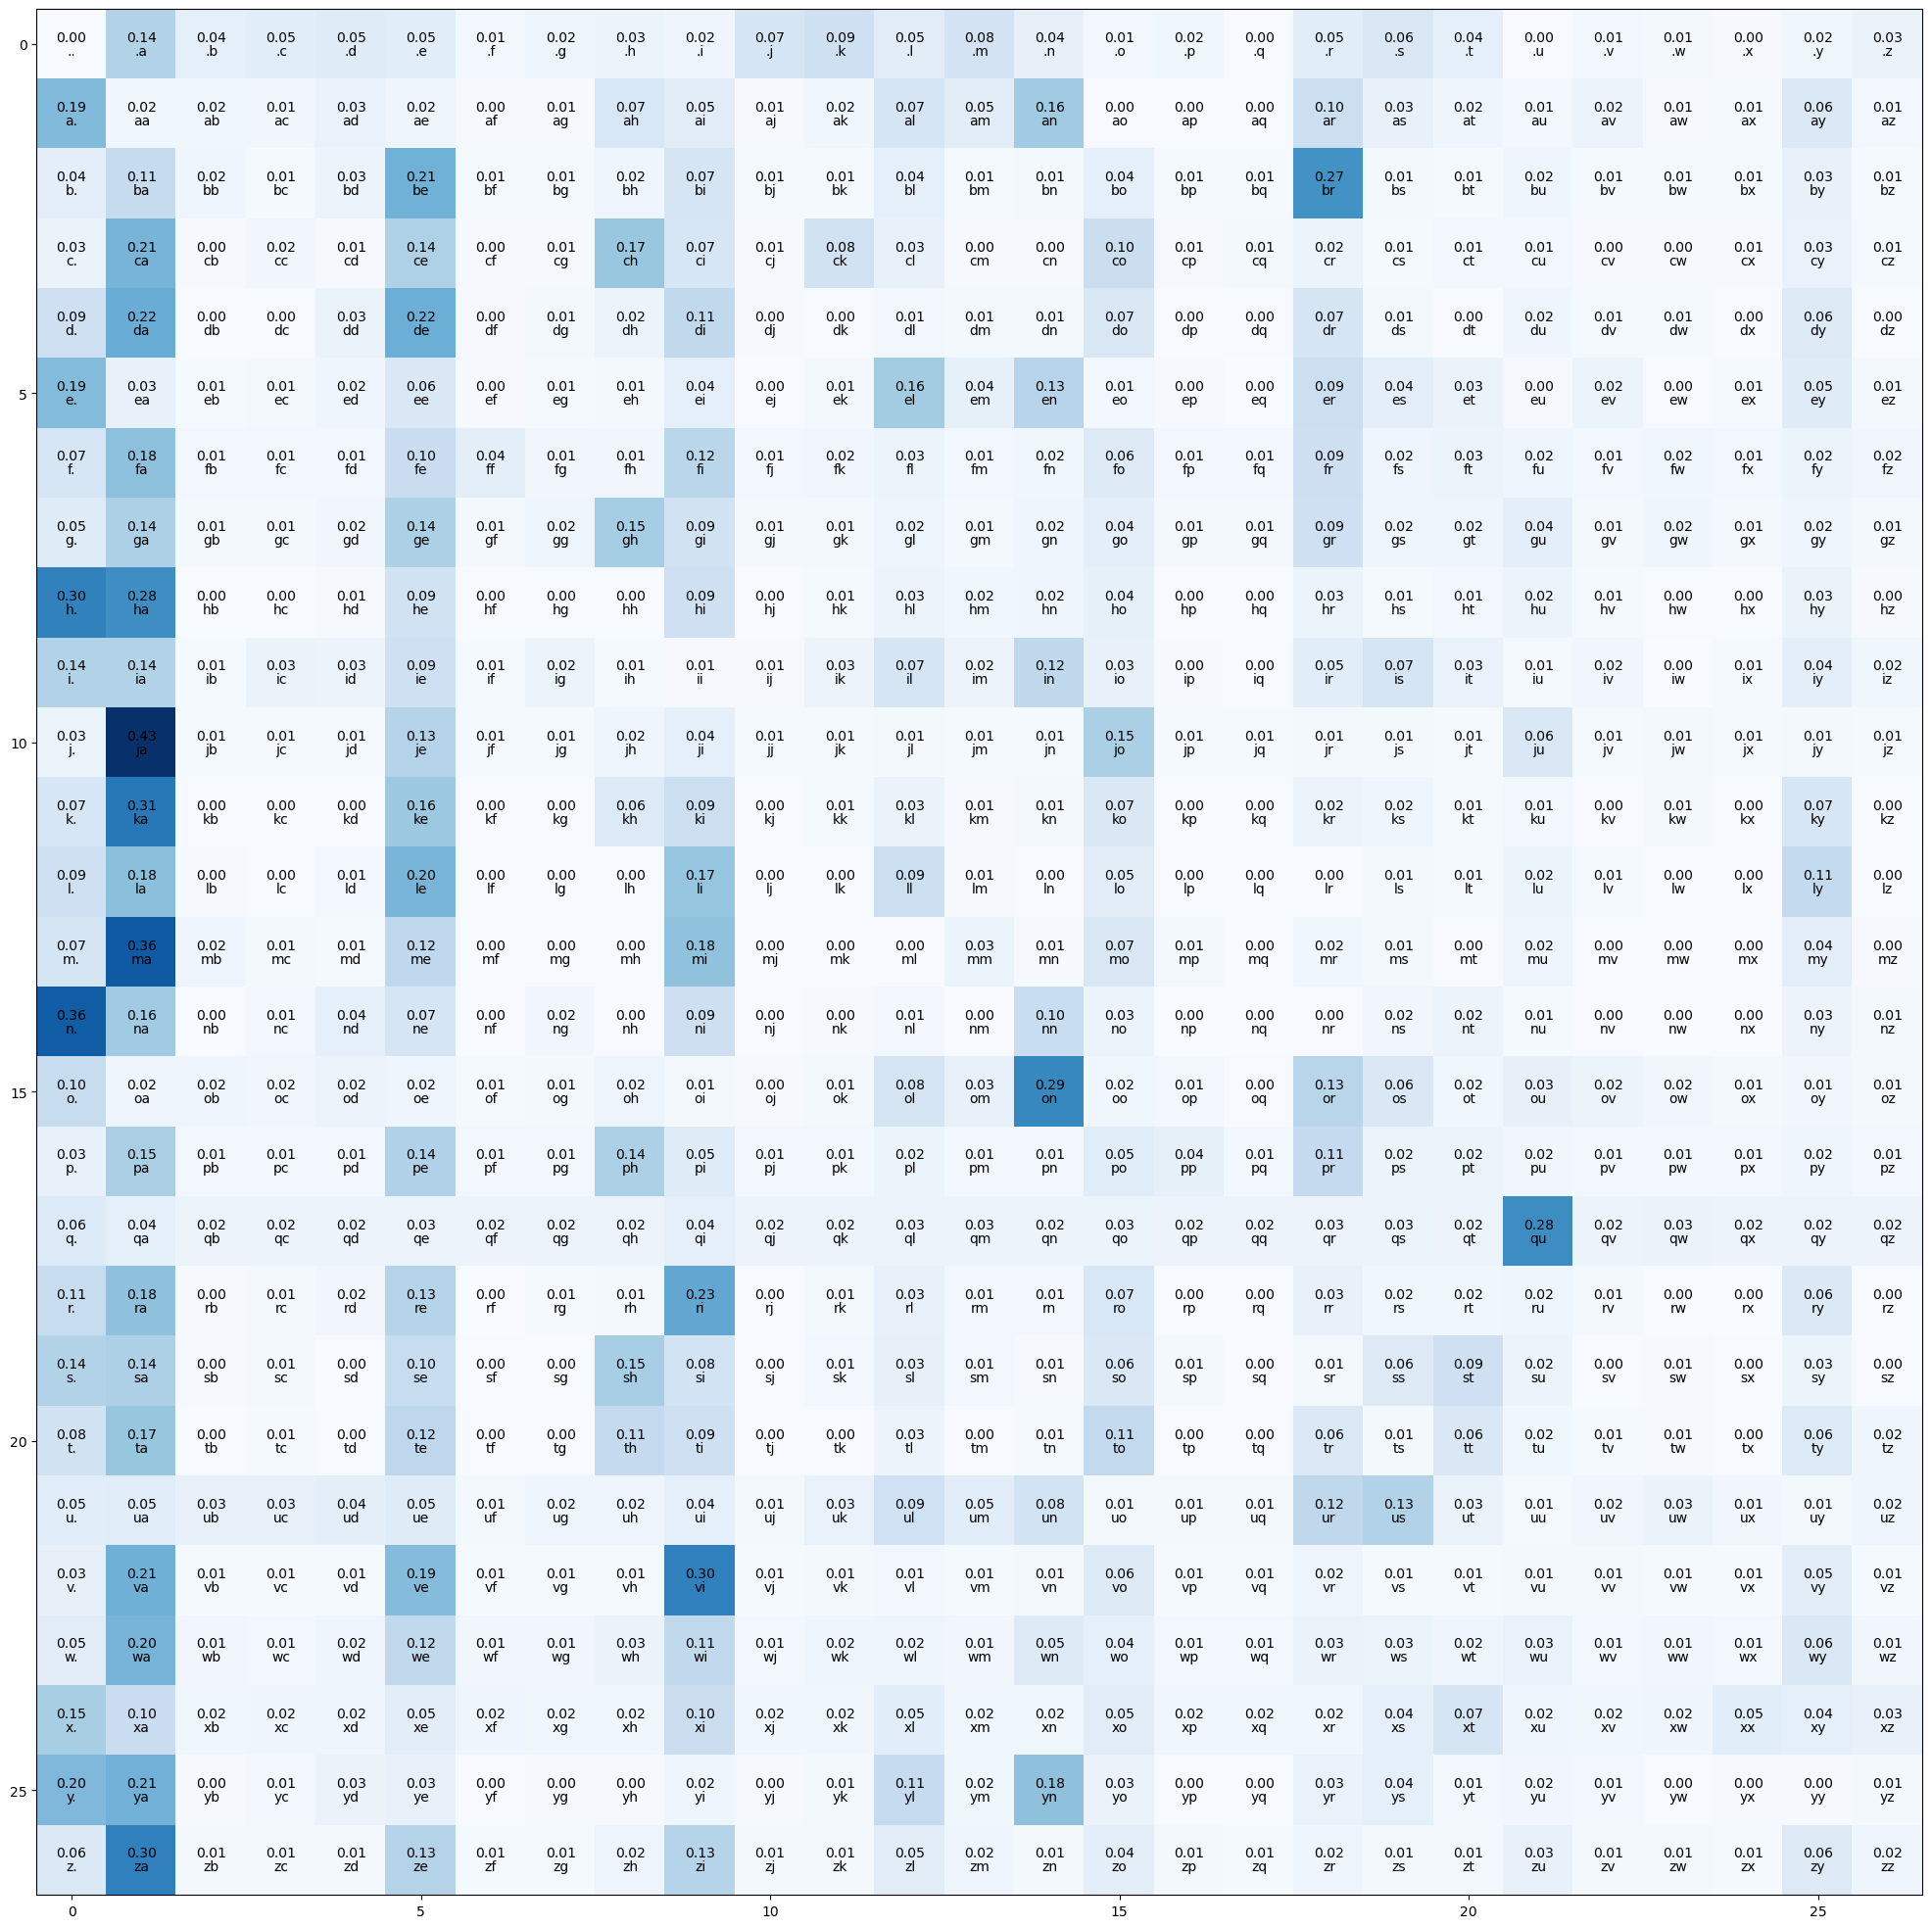

In [22]:
p[1].sum().item()
plt.figure(figsize = (25,25))
plt.imshow(p, cmap="Blues")
for i in range(27):
    for j in range(27):
        name = itos[i] + itos[j]
        chrs = p[i,j]
        plt.text(j, i, name, ha="center", va="top")
        plt.text(j, i, f'{chrs.item():.2f}',ha="center",va="bottom")
plt.show() 
#the normalised distribuiton heatmap

In [23]:
g=torch.Generator().manual_seed(21474836476)
ix=0
for _ in range(8):
    li=[]
    while True:
        a=p[ix]
        ix=torch.multinomial(a,num_samples=1, replacement=True, generator =g).item() #returns an index from the multinom distributuion
        li.append(itos[ix])
        if itos[ix]=='.':
            break
    print(''.join(li))


elana.
caderis.
e.
ttaxiylli.
ghalan.
pyn.
y.
ban.


In [24]:
log_likelihood = 0
n = 0
for i in words[:3]:
    chs=['.']+list(i)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        prob = p[ix1, ix2]
        logp = torch.log(prob)
        log_likelihood += logp
        n+=1
        print (f"{ch1}{ch2} : {prob:.4f} log: {logp:.4f}")
print(f'{log_likelihood: =}')
negative_log = -log_likelihood
print(f'negative log: {negative_log:.4f}')
print(f'negative log likelihood normalised: {negative_log/n:.4f}')  #we have to minimise this
#print(f'{p[17, 21]:.2f}')


.e : 0.0476 log: -3.0446
em : 0.0376 log: -3.2797
mm : 0.0262 log: -3.6429
ma : 0.3634 log: -1.0122
a. : 0.1935 log: -1.6427
.o : 0.0127 log: -4.3654
ol : 0.0754 log: -2.5849
li : 0.1724 log: -1.7577
iv : 0.0158 log: -4.1450
vi : 0.2991 log: -1.2071
ia : 0.1351 log: -2.0015
a. : 0.1935 log: -1.6427
.a : 0.1360 log: -1.9951
av : 0.0248 log: -3.6966
va : 0.2127 log: -1.5481
a. : 0.1935 log: -1.6427
-39.208717346191406
negative log: 39.2087
negative log likelihood normalised: 2.4505


In [25]:
#Neural Net
xs = []
ys = []
count=0
for i in words:
    chs = ['.'] + list(i) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        #print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)
        count+=1
inp=torch.tensor(xs)
out=torch.tensor(ys)
print(count)

228146


In [26]:
inp

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [27]:
out

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [28]:
import torch.nn.functional as F
enc = F.one_hot(inp, num_classes=27).float()
enc

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 1., 0., 0.]])

In [29]:
enc.shape

torch.Size([228146, 27])

In [211]:
gen = torch.Generator().manual_seed(694201)
w=torch.randn(27,27, requires_grad=True, generator =gen) #weights or knowledge

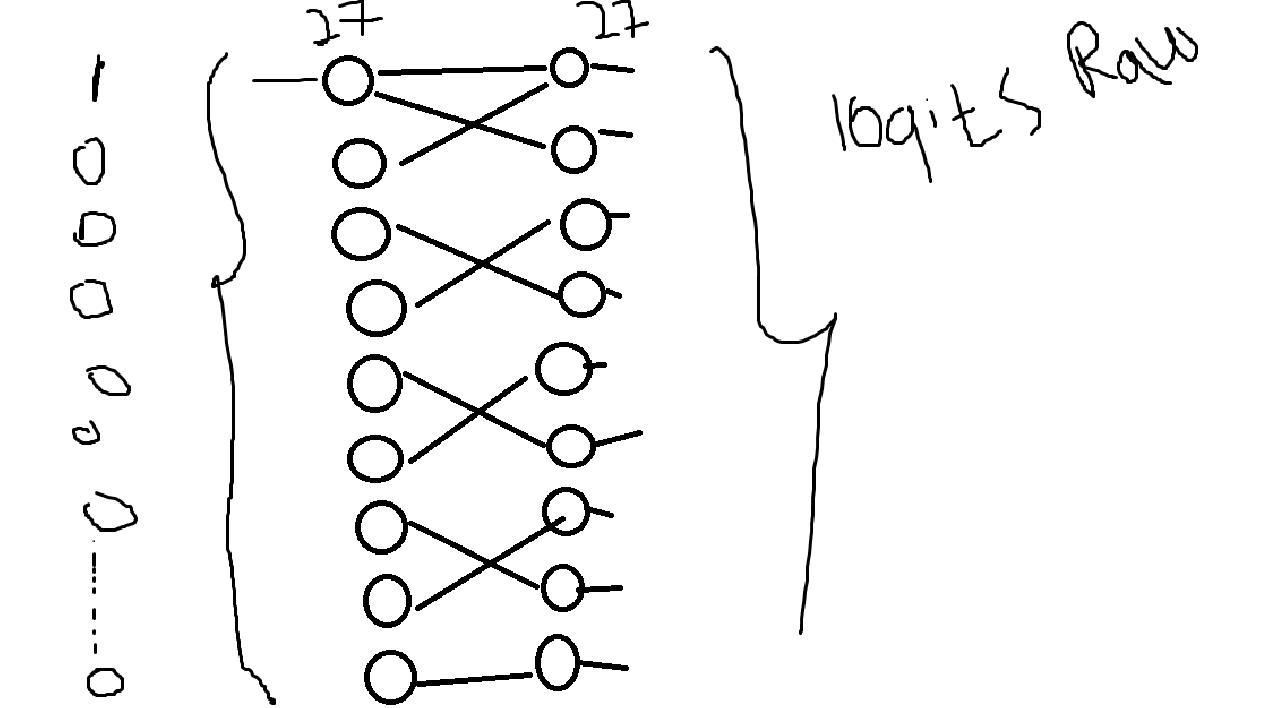

In [212]:
#logits

In [213]:
logits = enc @ w
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0216, 0.0122, 0.0315,  ..., 0.0582, 0.0799, 0.0101],
        [0.1195, 0.0352, 0.0578,  ..., 0.0517, 0.1183, 0.0075],
        [0.0772, 0.0240, 0.0263,  ..., 0.3459, 0.0103, 0.0225],
        ...,
        [0.0031, 0.0252, 0.1075,  ..., 0.0048, 0.0053, 0.0395],
        [0.0071, 0.0524, 0.0312,  ..., 0.0214, 0.0241, 0.0253],
        [0.0051, 0.0285, 0.0243,  ..., 0.0298, 0.0075, 0.1033]],
       grad_fn=<DivBackward0>)

In [214]:
probs.shape

torch.Size([228146, 27])

In [215]:
probs[0, 5]

tensor(0.1800, grad_fn=<SelectBackward0>)

loss descending hopefully: 2.5077342987060547
loss descending hopefully: 2.50769305229187
loss descending hopefully: 2.5076513290405273
loss descending hopefully: 2.507610321044922
loss descending hopefully: 2.507568836212158
loss descending hopefully: 2.5075275897979736
loss descending hopefully: 2.507486343383789
loss descending hopefully: 2.5074453353881836
loss descending hopefully: 2.507404327392578
loss descending hopefully: 2.5073633193969727
loss descending hopefully: 2.507322311401367
loss descending hopefully: 2.507281541824341
loss descending hopefully: 2.5072407722473145
loss descending hopefully: 2.507200002670288
loss descending hopefully: 2.5071589946746826
loss descending hopefully: 2.5071184635162354
loss descending hopefully: 2.507077932357788
loss descending hopefully: 2.507037401199341
loss descending hopefully: 2.5069968700408936
loss descending hopefully: 2.5069563388824463
loss descending hopefully: 2.506915807723999
loss descending hopefully: 2.50687575340271
lo

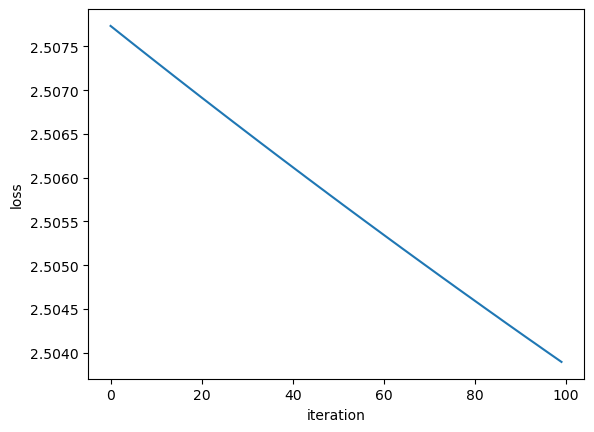

In [234]:
import numpy as np
loss_val = []
for _ in range(100):
    #forward pass
    enc = F.one_hot(inp, num_classes=27).float()
    logits = enc @ w
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    
    #loss function
    loss = -probs[torch.arange(count), out].log().mean()
    loss_val.append(loss.item())
    
    print(f'loss descending hopefully: {loss.item()}')
    
    #backpropogation
    w.grad = None
    loss.backward()
    
    #update weights
    w.data += -1.5 * w.grad

plt.plot(loss_val)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [224]:
#running again for same features in improved knowledege
'''
new_log = enc @ w
c = new_log.exp()
norm = c / c.sum(1, keepdims=True)
norm
'''

'\nnew_log = enc @ w\nc = new_log.exp()\nnorm = c / c.sum(1, keepdims=True)\nnorm\n'

In [238]:
genre = torch.Generator().manual_seed(470)
for _ in range(10):
    ans = []
    ix=0
    while True:
        xenc=F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        log = xenc @ w
        #print(log.shape)
        new = log.exp()
        div = new/new.sum(1, keepdims=True)
    
        ix = torch.multinomial(div, num_samples = 1, replacement=True, generator = genre).item()
        inte = itos[ix]
        ans.append(inte)
    
        if ix == 0:
            break
    print(''.join(ans))


sta.
toraluel.
kiqppspparon.
ws.
di.
eleryahinora.
s.
dqpdaijanalarn.
pondjire.
ma.


In [72]:
#a manual flow of the nn forward pass
x=5
thili=F.one_hot(torch.tensor([x]), num_classes = 27).float()
thili

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [73]:
y = thili @ w.exp()
y

tensor([[1.3847, 0.5545, 0.2480, 1.0782, 0.2996, 1.0856, 0.9419, 0.2286, 1.6202,
         0.2685, 0.3824, 0.2084, 2.6580, 1.0627, 0.5671, 0.6783, 0.1878, 1.1095,
         1.8771, 0.5343, 0.6589, 0.3897, 0.8350, 0.6118, 0.1818, 0.8576, 0.6290]],
       grad_fn=<MmBackward0>)

In [74]:
py = y/y.sum(1, keepdims = True)
py

tensor([[0.0655, 0.0262, 0.0117, 0.0510, 0.0142, 0.0514, 0.0446, 0.0108, 0.0766,
         0.0127, 0.0181, 0.0099, 0.1257, 0.0503, 0.0268, 0.0321, 0.0089, 0.0525,
         0.0888, 0.0253, 0.0312, 0.0184, 0.0395, 0.0289, 0.0086, 0.0406, 0.0298]],
       grad_fn=<DivBackward0>)

In [75]:
for _ in range(10):
    t = torch.multinomial(py, num_samples = 1, replacement = True,generator = genre).item()
    print(t)
    print(itos[t])

20
t
20
t
12
l
12
l
0
.
3
c
7
g
19
s
25
y
19
s


In [112]:
#lil bit experimenting
dicti = {}
xe = []
xa = []
for i in ["emma"]:
    cht = ['.'] + list(i) + ['.']
    for q1,q2 in zip(cht, cht[1:]):
        #print(f'{q1}{q2}')
        u = (q1,q2)
        if u not in dicti:
            dicti[u] = 1
        else:
            dicti[u] += 1
        cz = ctoi[q1]
        cy = ctoi[q2]
        xe.append(cz)
        xa.append(cy)
ab = torch.tensor(xe)
ba = torch.tensor(xa)
ab

tensor([ 0,  5, 13, 13,  1])

In [124]:
ba

tensor([ 5, 13, 13,  1,  0])

In [121]:
xencoding = F.one_hot(ab, num_classes = 27).float()
xencoding

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [196]:
gen = torch.Generator().manual_seed(112234)
we = torch.randn(27,27, generator = gen, requires_grad = True)

In [206]:
su[0, 5]

tensor(0.1979, grad_fn=<SelectBackward0>)

In [204]:
for _ in range(100):
    mat = xencoding @ we
    ex = mat.exp()
    su = ex/ex.sum(1, keepdims = True)
    loss_f = -su[torch.arange(5), ba].log().mean()
    print(f'{loss_f}')
    we.grad = None
    loss_f.backward()
    
    we.data += -0.1 * we.grad

4.286075592041016
4.265458583831787
4.24489164352417
4.2243757247924805
4.203909397125244
4.1834940910339355
4.1631293296813965
4.142816066741943
4.122554302215576
4.102343559265137
4.082184791564941
4.062077522277832
4.042021751403809
4.022019386291504
4.002068519592285
3.9821701049804688
3.96232533454895
3.9425323009490967
3.922792911529541
3.903106212615967
3.8834731578826904
3.863893985748291
3.844367504119873
3.8248953819274902
3.8054771423339844
3.7861130237579346
3.7668025493621826
3.747547149658203
3.7283453941345215
3.709198474884033
3.6901068687438965
3.671069383621216
3.6520869731903076
3.633159637451172
3.6142871379852295
3.5954699516296387
3.5767083168029785
3.558002471923828
3.539351224899292
3.520756244659424
3.5022168159484863
3.4837334156036377
3.465305805206299
3.446934223175049
3.428618907928467
3.4103591442108154
3.3921566009521484
3.374009609222412
3.355919361114502
3.3378853797912598
3.3199081420898438
3.301987409591675
3.2841238975524902
3.2663168907165527
3.2485

In [205]:
su[0,5]

tensor(0.1979, grad_fn=<SelectBackward0>)